# EDA

## Overview

The big question I have on the onset of this research is how granular do we need to get in our model?

* Are the dyanmics similar enough across stations such that they can all be included in the same model, or do we need to build models for clusters of stations? We will try some logical groupings to see if there are any global patterns of dynamics across them. 

* Weekday-Weekend? Day by day? Month by month? Seasonality? Let's do some side-by-side visualizations of these time periods to see if any trends emerge. 

* How granular should we be in time bins (1 hour bins, 10 minutes, 1 minute)? I think some simple histograms can help us identity the kinds of volume of activity we are seeing. 

I'm curious about the number of bikes in the fleet, month by month, year by year. I think his may map onto the growth of the company, and that there may be different dynamics at each scale of growth. This is a big question I have with this data going forward - how will this prediction model scale? I'd love to work closely with the company to observe such shifts. 

## Top Stations

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint
%load_ext autoreload

may_15 = pd.read_csv('~/Code/bikesupply/data/test_data/trips_may2015.csv')
may_16 = pd.read_csv('~/Code/bikesupply/data/test_data/trips_may2016.csv')

In [3]:
may_15[0:3]

,Unnamed: 0,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,...,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
0,3,772874,733,2015-05-19 09:50:00,Davis at Jackson,42,2015-05-19 10:02:00,2nd at Townsend,61,501,...,Subscriber,2015-05-19,2015-05-19,2015,5,19,09:50:00,19,10:02:00,20150519
1,102,751066,481,2015-05-03 21:03:00,Broadway St at Battery St,82,2015-05-03 21:11:00,Steuart at Market,74,363,...,Subscriber,2015-05-03,2015-05-03,2015,5,3,21:03:00,3,21:11:00,20150503
2,131,758565,319,2015-05-08 08:12:00,Redwood City Medical Center,26,2015-05-08 08:18:00,Redwood City Caltrain Station,22,106,...,Subscriber,2015-05-08,2015-05-08,2015,5,8,08:12:00,8,08:18:00,20150508


In [4]:
departures_may_15 = may_15['start_station_id']
departures_may_16 = may_16['start_station_id']
arrivals_may_15 = may_15['end_station_id']
arrivals_may_16 = may_16['end_station_id']

may_15_departures_count, division = np.histogram(departures_may_15, bins = range(1,84))
may_15_arrivals_count, division = np.histogram(arrivals_may_15, bins = range(1,84))

# Plot histograms 
# fig = plt.figure(figsize=(20, 6)) 
# f, axarr = plt.subplots(2, 2)
# axarr[0, 0].hist(departures_may_15, 84, histtype='stepfilled', color = '#4d5665')
# axarr[0, 0].set_title('2015 Departures')
# axarr[0, 1].hist(departures_may_16, 84, histtype='stepfilled', color = '#c8b9a4')
# axarr[0, 1].set_title('2015 Arrivals')
# axarr[1, 0].hist(arrivals_may_15, 84, histtype='stepfilled', color = '#4d5665')
# axarr[1, 0].set_title('2016 Departures')
# axarr[1, 1].hist(arrivals_may_16, 84, histtype='stepfilled', color = '#c8b9a4')
# axarr[1, 1].set_title('2016 Arrivals')

In [5]:
may_15_departures_count

array([   0,  420,   50,  173,   70,  123,   67,   43,  106,   58,   85,
         36,   71,   45,    0,   31,    0,    0,    0,    0,    3,   67,
          5,    5,   34,   18,  135,  317,   87,   71,   90,  109,   51,
        101,   30,   26,   57,   34,  824,    0,  466,  453,    0,    0,
        519,  212,  392,  385,  483, 1510,  583,    0,    0,  604, 1232,
        616,  591,  165,  326, 1271, 1069,  659,  594,  798, 1152,  491,
       1001,  480, 1924, 2023,  582,  706,  710, 1082,  553,  762,  972,
          0,    0,   37,    0,  618])

In [6]:
import collections

def top_stations(array, top_number):
    stations = {}
    for i in range(0, len(array)):
        stations[i+1] = array[i]
    d = collections.Counter(stations)
    top_stations = {}
    for k, v in d.most_common(top_number):
        top_stations[k] = v
    return top_stations 

In [7]:
top_stations(may_15_departures_count, 5)

{50: 1510, 55: 1232, 60: 1271, 69: 1924, 70: 2023}

In [8]:
top_stations(may_15_arrivals_count, 5)

{50: 1426, 60: 1486, 65: 1329, 69: 2094, 70: 2412}

In [9]:
stations_list = pd.read_csv('~/Code/bikesupply/data/babs_download/babs_yr2/201508_station_data.csv')

In [10]:
stations_list.query("station_id == 50")

,station_id,name,lat,long,dockcount,landmark,installation
39,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,8/20/2013


In [11]:
stations_list.query("station_id == 69")

,station_id,name,lat,long,dockcount,landmark,installation
57,69,San Francisco Caltrain 2 (330 Townsend),37.7766,-122.39547,23,San Francisco,8/23/2013


In [12]:
stations_list.query("station_id == 70")

,station_id,name,lat,long,dockcount,landmark,installation
58,70,San Francisco Caltrain (Townsend at 4th),37.776617,-122.39526,19,San Francisco,8/23/2013


This follows a logic test, as these are indeed stations we'd expect to be popular. 

## Analyzing flow

At first glance we can see the situation we are trying to identify with this project - the popular stations show more arrivals than departures! But, how much more?

BABS has data on the available bikes and docks at each station throughout the day, but does this include data on transfers made by the company?


In [13]:
status_2015 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may15.csv')

In [14]:
status_2015[0:5]

,Unnamed: 0,station_id,bikes_available,docks_available,time,month
0,347015,2,15,12,2015-05-01 00:00:02,5
1,347016,2,15,12,2015-05-01 00:01:02,5
2,347017,2,15,12,2015-05-01 00:02:02,5
3,347018,2,15,12,2015-05-01 00:03:02,5
4,347019,2,15,12,2015-05-01 00:04:02,5


In [15]:
status_2015['time'] = pd.to_datetime(status_2015['time'])
status_2015 = status_2015.set_index('time')

In [16]:
def bikes_available_for_datetime_and_station(dt, station_id):
    return status_2015.query('station_id == @station_id').loc[dt].bikes_available

In [17]:
status_2015['hour'] = [ts.hour for ts in status_2015.index]
status_2015['weekday'] = [ts.weekday() for ts in status_2015.index]

In [18]:
means_2015 = status_2015.groupby(['weekday','station_id','hour']).mean()

In [19]:
station_50 = status_2015.query("station_id == 50")
station_69 = status_2015.query("station_id == 69")
station_70 = status_2015.query("station_id == 70")

In looking through this file I do not see information on company changes (nothing listed overtly), so I would like to use this to set the initial values for each day (midnight supply), and then calculate rates of change with trips data. 

## May 4, 2015

Let's slice off a Monday and zoom in to see what we learn.

In [19]:
may_4 = may_15.query('end_day == 4')

In [20]:
print len(may_4)

1294


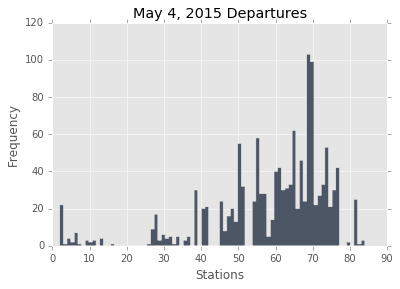

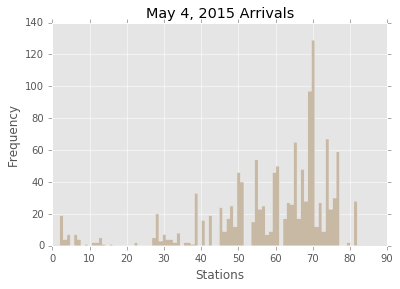

In [22]:
departures_may_4 = may_4['start_station_id']
departures_may_11 = may_11['start_station_id']
arrivals_may_4 = may_4['end_station_id']
arrivals_may_11 = may_11['end_station_id']

plt.figure(1)

plt.hist(departures_may_4, 84, histtype='stepfilled', color = '#4d5665')
plt.title('May 4, 2015 Departures')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(2)

plt.hist(arrivals_may_4, 84, histtype='stepfilled', color = '#c8b9a4')
plt.title('May 4, 2015 Arrivals')
plt.xlabel('Stations')
plt.ylabel('Frequency')

As we say in our May data, we see more arrivals than departures for a few of the leading stations around 68. It would be good to calculate some deltas for each station across the entire day for these two days. 

### What are the top three most active stations?

## Graph for May 4

In [7]:
may_4[0:5]

,Unnamed: 0,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,...,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
25,945,752508,758,2015-05-04 17:54:00,Embarcadero at Folsom,51,2015-05-04 18:07:00,San Francisco Caltrain 2 (330 Townsend),69,509,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,17:54:00,4,18:07:00,20150504
32,1192,752043,441,2015-05-04 14:28:00,2nd at South Park,64,2015-05-04 14:35:00,Yerba Buena Center of the Arts (3rd @ Howard),68,687,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,14:28:00,4,14:35:00,20150504
41,1413,752524,612,2015-05-04 18:01:00,Market at 10th,67,2015-05-04 18:11:00,San Francisco Caltrain 2 (330 Townsend),69,309,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,18:01:00,4,18:11:00,20150504
68,2228,751517,650,2015-05-04 08:40:00,Powell at Post (Union Square),71,2015-05-04 08:51:00,San Francisco Caltrain (Townsend at 4th),70,598,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,08:40:00,4,08:51:00,20150504
78,2605,752621,348,2015-05-04 18:22:00,San Jose Diridon Caltrain Station,2,2015-05-04 18:28:00,San Pedro Square,6,205,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,18:22:00,4,18:28:00,20150504


### Object Oriented approach

In [8]:
# Object oriented option
%autoreload
from network import Stations

### SciPy matrix model approach

In [9]:
# Define matrix for SciPy graph modeling - https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html
d = np.zeros([84, 84])

In [10]:
may_4.columns

Index([u'Unnamed: 0', u'trip_id', u'duration_sec', u'start_date',
       u'start_station_name', u'start_station_id', u'end_date',
       u'end_station_name', u'end_station_id', u'bike_number', u'zip_code',
       u'subscriber_type', u'start_just_date', u'end_just_date', u'year',
       u'month', u'start_day', u'start_time', u'end_day', u'end_time',
       u'end_yyyymmdd'],
      dtype='object')

In [11]:
# Create matrix of station counts
for i, row in may_4.iterrows():
    d[row['start_station_id']-1][row['end_station_id']-1] += 1

In [12]:
d[0:2]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  6.,  0.,  3.,  4.,  0.,  0.,  0.,  2.,  1.,  2.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
import scipy as sp
from scipy.sparse import csgraph

In [16]:
test = csgraph.connected_components(d)

In [17]:
test[0:2]

(25, array([ 0,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  4,
         5,  6,  7,  8,  9, 10, 11, 12,  9, 13, 13, 13, 13, 13, 13, 13, 14,
        15, 14, 14, 14, 16, 17, 16, 16, 18, 19, 16, 16, 16, 16, 16, 16, 16,
        20, 21, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 23,  1, 24, 16,  9,  1], dtype=int32))